# COMP 7180 Play MNIST with PCA

## Introduction
The MNIST [1] database is an image dataset of handwritten digits (0~9). Each image in MNIST is represented by a pixel matrix of 28\*28, totally 784 elements. Since the images in MNIST are in gray scale, the value of each pixel ranges from 0 to 255, representing different gray degrees. 

For this assignment, we have two ".csv" files, the training dataset "mnist_train.csv" and the testing dataset "mnist_test.csv". Each sample/row in the file represents an image sample. The first column indicates the handwritten digit of the image (label). Each of the rest columns denotes the value of each pixel axis (from 1 to 28 for both x-axis and y-axis) in an image. For example, the column "1x28" denotes the pixel value at $x=1$ (the first row) and $y=28$ (the 28th column). Now we want you to apply PCA to MNIST for data analytics as well as some advanced prediction tasks. 

#### 1. Load "mnist_train.csv" with pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_data = pd.read_csv("./mnist_train.csv")

#### 2. Print the shape of the training dataset

In [4]:
#28*28 = 784
train_data.shape

(60000, 785)

#### 3. Take the pixel values of the first sample and reshape it to (28, 28)

In [5]:
firstsample_label = train_data.iloc[0,0:1]
firstsample_data = train_data.iloc[0,1:]
data_reshape1 = firstsample_data.values.reshape(28,28)
data_reshape1 = pd.DataFrame(data_reshape1)
data_reshape1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


#### 4. Plot the above sample with plt.imshow()

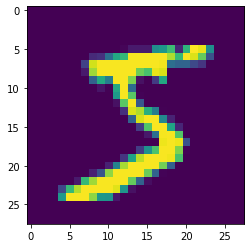

In [6]:
plt.imshow(data_reshape1, vmin=0, vmax=255)

#### 5. Split the dataset into X (the pixel values) and y (the digit label)

In [7]:
data_y =  train_data.iloc[:,0:1]
data_x = train_data.iloc[:,1:]

data_x.shape

(60000, 784)

#### 6. Standardize X by dividing 255.0

In [8]:
std_x = data_x/255.0
std_x

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 7. Apply PCA to X and obtain the eigenvalues as well as the eigenvectors (please implement it with numpy instead of other advanced libraries)

In [9]:
S = np.cov(std_x.T)
eigenvalues, eigenvectors = np.linalg.eig(S)
eigenvalues

array([ 5.11687301e+00,  3.74139084e+00,  3.25270845e+00,  2.84162070e+00,
        2.56711774e+00,  2.27366339e+00,  1.72515498e+00,  1.52056024e+00,
        1.45630525e+00,  1.24275009e+00,  1.11208951e+00,  1.06664054e+00,
        9.04680833e-01,  8.92181223e-01,  8.32353048e-01,  7.81900323e-01,
        6.98386871e-01,  6.73255811e-01,  6.25995240e-01,  6.07763020e-01,
        5.62145880e-01,  5.30798829e-01,  5.02780255e-01,  4.81147033e-01,
        4.65783200e-01,  4.42538691e-01,  4.28439606e-01,  4.14618707e-01,
        3.92667337e-01,  3.64261791e-01,  3.46985958e-01,  3.41741890e-01,
        3.17734284e-01,  3.09280821e-01,  3.00549034e-01,  2.86632712e-01,
        2.66680512e-01,  2.57227909e-01,  2.53838022e-01,  2.49006738e-01,
        2.40823990e-01,  2.34543854e-01,  2.20658652e-01,  2.09962678e-01,
        2.02981381e-01,  1.97776690e-01,  1.90872477e-01,  1.85379715e-01,
        1.79298798e-01,  1.69711256e-01,  1.68204657e-01,  1.64929264e-01,
        1.56059568e-01,  

#### 8. You may notice that the results contain the complex numbers of which the imaginary part is zero. Please remove the imaginary part with np.real()

In [11]:
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

#### 9. Use the top-30 eigenvectors (with the largest three eigenvalues) to transform the training data to Z.

In [12]:
index = np.argsort(eigenvalues)[::-1]
eigenvalues,eigenvectors = eigenvalues[index], eigenvectors[:, index]
print(eigenvectors.shape)
eigenvectors = eigenvectors[:,0:30]

print(eigenvectors.shape)
print(std_x.shape)
Z = np.dot(std_x,eigenvectors)
Z

(784, 784)
(784, 30)
(60000, 784)


array([[-3.45384876, -1.29392457,  0.77492676, ..., -0.6360691 ,
        -0.51386024,  0.5206804 ],
       [-6.93536165, -1.22405311,  3.20964681, ..., -0.16166522,
        -1.43901047,  0.3729488 ],
       [-2.76450681,  1.47018294,  0.13180638, ..., -0.52084165,
         0.02981159,  1.12786725],
       ...,
       [-2.26958978,  0.5600067 , -0.13918709, ...,  0.64755595,
        -0.71228873,  1.51175629],
       [-3.48001928, -0.08968016,  2.88619235, ...,  1.11891731,
        -0.48737813, -0.14931916],
       [-2.28769762, -0.16468747,  3.05152655, ...,  0.7286741 ,
        -0.21899266, -0.11495676]])

#### 10. Reconstruct the training data from Z to $\widetilde{X}$, then multiply it by 255.0

In [13]:
x_remake = np.dot(Z,eigenvectors.T) * 255.0
x_remake.shape

(60000, 784)

#### 11. Plot the first sample of the reconstructed data $\widetilde{X}$. Compare it with the original one. Are they close to each other?

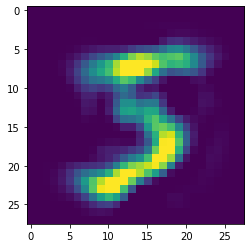

In [14]:
firstsample_data = x_remake[0]
data_reshape2 = firstsample_data.reshape(28,28)
plt.imshow(data_reshape2, vmin=0, vmax=255)

#### 12. Calculate the mean square error of the above reconstructed with respect to the original one

In [15]:
mse = ((x_remake - data_x)**2).mean(axis=1)
print(mse[0])

1525.2600011382613


#### 13. Now try another experiment. Pick up the top-100 eigenvectors (with the largest 100 eigenvalues) to transform the training data. Then again plot the first reconstructed sample and calculate the mean square error. You may warp it with a python function.

The MSE for the first sample is 540.2871121074667


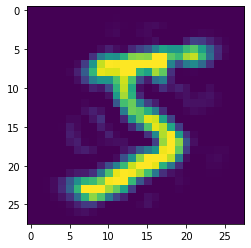

In [16]:
def pca100_show(data_x):
    std_x = data_x/255.0
    S = np.cov(std_x.T)
    eigenvalues, eigenvectors = np.linalg.eig(S)
    index = np.argsort(eigenvalues)[::-1]
    eigenvalues,eigenvectors = eigenvalues[index], eigenvectors[:, index]
    eigenvectors = eigenvectors[:,:100]
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)
    Z = np.dot(std_x,eigenvectors)

    x_remake = np.dot(Z,eigenvectors.T) * 255.0
    firstsample_data = x_remake[0]
    data_reshape = firstsample_data.reshape(28,28)
    plt.imshow(data_reshape, vmin=0, vmax=255)
    mse = ((x_remake - data_x)**2).mean(axis=1)
    print("The MSE for the first sample is",mse[0])

pca100_show(data_x)


## Logistic Regression
Classification is among the most important areas of machine learning, and logistic regression is one of its basic methods. Basically, it takes the sample features as input and predicts its categorical label. Take MNIST as example, we can take the pixel values of a sample image as input and predict its number. 

As an example, we first show how to apply logistic regression to the original data (assume that X has been standardized).

#### (1) Import the scikit-learn library and use the LogisticRegression module to fix the data. It may run about one minute for the MNIST training dataset.

In [21]:
from sklearn.linear_model import LogisticRegression

# TO DO: please indicate your standardized training feature data 'X' 
#                        and the training label data 'y' from "mnist_train.csv"
X = std_x.values
y = train_data['label']

clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000).fit(X, y) 
print(clf)

LogisticRegression(max_iter=1000, random_state=0)


#### (2) Load the testing data "mnist_test.csv", remember to stardardize it by dividing 255.0. Use the above fitted model "clf" to predict the labels

In [22]:
# TO DO: please indicate your testing feature data 'test_X' from "mnist_test.csv", remember to do standardization.
test_data = pd.read_csv('./mnist_test.csv')
test_dataX = test_data.iloc[:,1:]
print(test_dataX.shape)
test_X = test_dataX/255.0
predict_y = clf.predict(test_X)
predict_y = predict_y.reshape(10000,1)
predict_y.shape


(10000, 784)


(10000, 1)

#### (3) Calculate the accuracy of the fitted model on the testing data set

In [23]:
# TO DO: please indicate your testing label data 'test_y'
test_y = test_data.iloc[:,0:1]

true_count = np.sum(predict_y ==test_y )
true_count
print("The model obtains %f%% of accuracy." % (true_count / len(test_y) * 100.0))

The model obtains 92.560000% of accuracy.


You are expected to get around 92% of accuracy on the testing dataset. 

Now we would like you to find if we can use the transformed features of PCA to do the same logistic regression task. It has two advantages. First, it decreases the storage requirement of the data. Second, by dimension reduction, the running time of logistic regression can be shorten. 

#### 14. Use the top-100 eigenvectors to transform the standardized training data.

In [25]:
def pca_change(data_x,k):
    std = data_x/255.0
    S = np.cov(std.T)
    evalues, evectors = np.linalg.eig(S)
    evalues = np.real(evalues)
    evectors = np.real(evectors)
    index = np.argsort(evalues)[::-1]
    evalues,evectors = evalues[index], evectors[:, index]
    evectors = evectors[:,0:k]

    Z = np.dot(std,evectors)
    res = np.dot(Z,evectors.T)
    return res

Z = pca_change(data_x,100)
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### 15. Use the transformed data to do logistic regression.

In [26]:
X = Z
y = train_data['label']

clf_test = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000).fit(X, y) 

#### 16. Apply the new model to the testing dataset. Notice that you should do the same standardization and PCA transformation for the testing dataset. Again you can calculate the model accuracy. 

In [27]:
test_Z = pca_change(test_dataX,100)
test_Z
predict_pcay = clf_test.predict(test_Z).reshape(10000,1)

true_count = np.sum(predict_pcay == test_y)
print("The model obtains %f%% of accuracy." % (true_count / len(test_y) * 100.0))

The model obtains 92.200000% of accuracy.


#### 17. Suppose that we expect that the fitted model has at least 90% of accuracy on the testing dataset. Please find that how many eigenvectors should we choose at least.

In [33]:
def accuracy(k):
    X = pca_change(data_x,k)
    y = train_data['label']

    clf_test = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000).fit(X, y) 
    test_Z = pca_change(test_dataX,k)
    predict_pcay = clf_test.predict(test_Z).reshape(10000,1)
    true_count = np.sum(predict_pcay == test_y)
    print("The model obtains %f%% of accuracy." % (true_count / len(test_y) * 100.0))
    print("The eigenvectors should be",k)
    
accuracy(34)

The model obtains 90.130000% of accuracy.
The eigenvectors should be 34


## References
[1] THE MNIST DATABASE of handwritten digits. http://yann.lecun.com/exdb/mnist/

[2] Logistic Regression. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html